## import os
import sys
sys.path.append('../../kl_tools/')
import numpy as np
from astropy.units import Unit
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import galsim as gs
import galsim.roman as roman
from galsim.angle import Angle, radians
import pickle
import basis
import cube
import intensity
import likelihood
import mcmc
import parameters
from parameters import Pars
import priors
import utils
import velocity
from DataSimulator import DataSimulator
from likelihood import LogLikelihood_Roman
import getdist
from getdist import plots, MCSamples
# new modules
from spectrum import Spectrum
#from MockObs import Mock
%matplotlib inline
#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 18}

#matplotlib.rc('font', **font)

In [94]:
#datadir = "/Users/jiachuanxu/Workspace/KL_measurement/kl-tools/tests/test-mcmc-run/test_mcmc_roman_interactive"
#datadir = "/Users/jiachuanxu/Workspace/KL_measurement/kl-tools/tests/test-mcmc-run/test_mcmc_roman"
#datadir = "/Users/jiachuanxu/Workspace/KL_measurement/kl-tools/tests/test-mcmc-run/test_mcmc_roman_puma"
#datadir = "/Users/jiachuanxu/Workspace/KL_measurement/kl-tools/tests/test-mcmc-run-diag"
datadir = "/Users/jiachuanxu/Workspace/KL_measurement/kl-tools/tests/test-mcmc-run/test_mcmc_roman_slitmask"
runner_file = datadir+"/test-mcmc-runner.pkl"
sampler_file = datadir+"/test-mcmc-sampler.pkl"
truth_file = datadir+"/test-mcmc-truth.pkl"



In [95]:
with open(runner_file, 'rb') as f:
    runner = pickle.load(f)
with open(sampler_file, 'rb') as f:
    sampler = pickle.load(f)
with open(truth_file, 'rb') as f:
    truth = pickle.load(f)

In [96]:
chain = sampler.get_chain(flat=True)

In [97]:
mks = {}
for k,v in zip(names, truth):
    mks[k]=v
print(mks)

{'g1': 0.05, 'g2': 0.05, 'theta_int': 0.0, 'sini': 0.2, 'v0': 0.0, 'vcirc': 5000.0, 'hlr': 0.5}


In [98]:
sampler.nwalkers

14

In [99]:
names = ['g1', 'g2', 'theta_int', 'sini', 'v0', 'vcirc', 'hlr']
labels= [r'g_1', r'g_2', r'\theta_{int}', r'sin(i)', r'v_0', r'v_{circ}', r'r_{hlr}']
sample = getdist.mcsamples.MCSamples(samples=chain[int(chain.shape[0]/2):], 
                                     names=names, 
                                    labels=labels)

Removed no burn in


[(0.0, 1.0)]

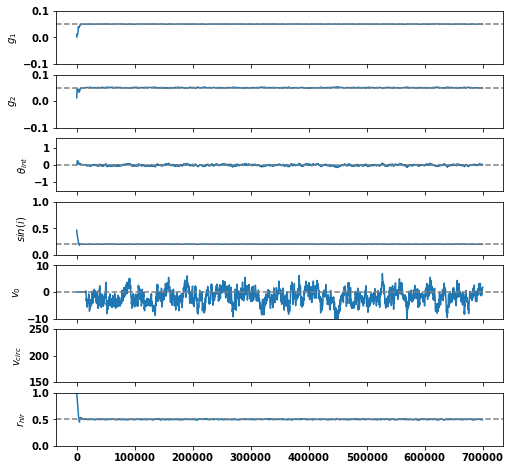

In [100]:
fig, axes = plt.subplots(7,1, figsize=(8,8), sharex=True)
steps = range(chain.shape[0])
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
for i in range(7):
    ax = axes[i]
    #_chain = [np.mean(chain[j*200:(j+1)*200,i]) for j in range(280)]
    _chain = moving_average(chain[:,i], 200)
    ax.plot(steps[::200], _chain[::200])
    ax.axhline(truth[i], ls='--', color='grey')
    ax.set(ylabel='$%s$'%labels[i])
axes[0].set(ylim=(-0.1,0.1))
axes[1].set(ylim=(-0.1,0.1))
axes[2].set(ylim=(-np.pi/2, np.pi/2))
axes[3].set(ylim=(0,1))
axes[4].set(ylim=(-10,10))
axes[5].set(ylim=(150,250))
axes[6].set(ylim=(0,1))

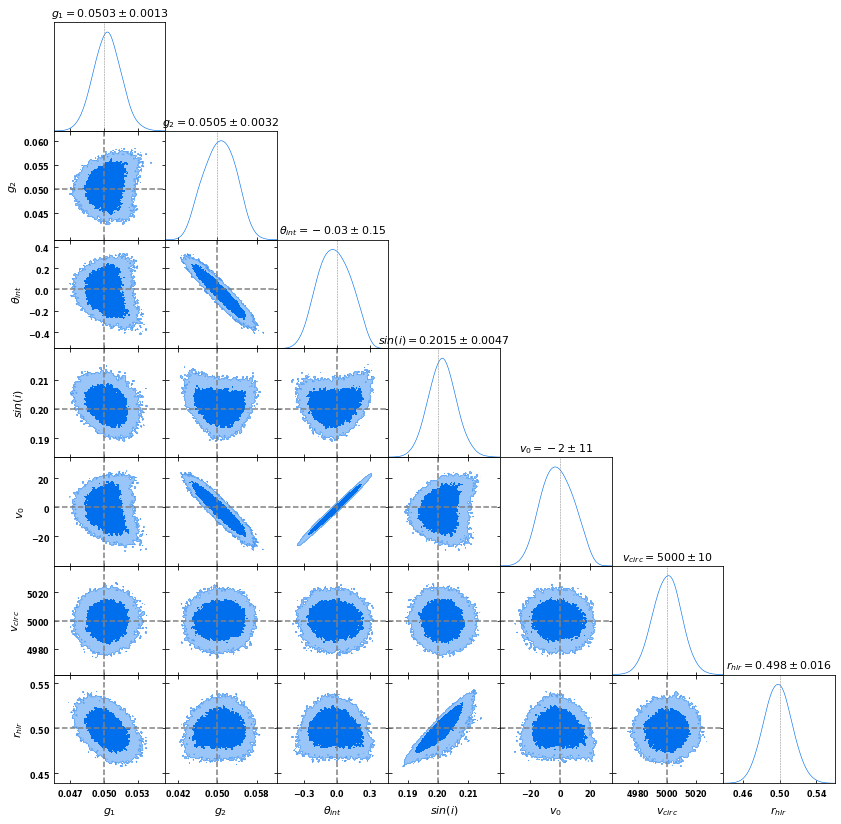

In [101]:
g = plots.get_subplot_plotter()
g.settings.title_limit_fontsize = 14
g.triangle_plot([sample], filled=True, title_limit=1,
               markers=mks, marker_args={'lw':1.5,'ls':'--'})

In [83]:
dvs = runner.pfunc.log_likelihood.datavector
cvs = runner.pfunc.log_likelihood.covariance

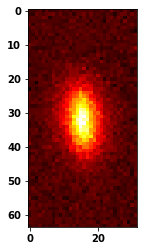

In [90]:
plt.imshow(dvs[1]+cvs[1], cmap='hot')

In [2]:
datadir = "/Users/jiachuanxu/Workspace/KL_measurement/kl-tools/tests/test-mcmc-run/test_mcmc_roman"
runner_file = datadir+"/test-mcmc-runner.pkl"
sampler_file = datadir+"/test-mcmc-sampler.pkl"
truth_file = datadir+"/test-mcmc-truth.pkl"

In [3]:
with open(runner_file, 'rb') as f:
    runner = pickle.load(f)
with open(sampler_file, 'rb') as f:
    sampler = pickle.load(f)
with open(truth_file, 'rb') as f:
    truth = pickle.load(f)

In [4]:
chain = sampler.get_chain(flat=True)

In [5]:
chain.shape

(140, 7)

In [7]:
sampler.blobs.shape

(10, 14, 4)

In [31]:
a = 1
b = np.array([1, 2, 3])
ans = [a, np.sum(b)]
if isinstance(b, (list, np.ndarray)):
    ans.extend(b)
else:
    ans.extend([b])

In [32]:
print(ans)

[1, 6, 1, 2, 3]
